In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!unzip drive/MyDrive/contact.zip

Archive:  drive/MyDrive/contact.zip
replace contact_0/58168_003392_Endzone_0_A23_A32.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: contact_0/58168_003392_Endzone_0_A23_A32.jpg  
replace contact_0/58168_003392_Endzone_0_A55_H13.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

augmented_images  contact_0  contact_1	drive  sample_data


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# !cd drive/MyDrive

In [ ]:
# import os
# os.path.join('drive/MyDrive/')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB0
import os

paths = pd.DataFrame(columns = ['image_path','label'])

directories = []
contacts = []

for name in os.listdir('contact_0'):
    path = os.path.join('contact_0' ,name)
    directories.append(path)
    contacts.append(0)

for name in os.listdir('contact_1'):
    path = os.path.join('contact_1' ,name)
    directories.append(path)
    contacts.append(1)

directories = np.array(directories)
contacts = np.array(contacts)
paths['image_path'] = directories
paths['label'] = contacts
#     img = cv2.imread(path)
#     plt.imshow(img)
#     plt.show()
#     break
#     name = name.replace('.jpg','')
#     l = name.split('_')
#     game_plays.append('_'.join(l[:2]))
#     views.append(l[2])
#     steps.append(int(l[3]))
# #     player_labels.append(l[4])
#     jersey_number1.append(int(l[4][1:]))
#     jersey_number2.append(int(l[5][1:]))
#     contact.append(1)
# #     print(img.shape)
#     img_resized = cv2.resize(img,(150,150))
#     img_arr.append(img_resized.flatten())

16705208/16705208 [==============================] - 0s 0us/step


Epoch 1/50
151/151 [==============================] - 66s 117ms/step - loss: 2.6111 - accuracy: 0.7029 - val_loss: 0.6092 - val_accuracy: 0.7348
Epoch 2/50
151/151 [==============================] - 15s 101ms/step - loss: 0.5390 - accuracy: 0.7638 - val_loss: 0.5653 - val_accuracy: 0.7356
Epoch 3/50
151/151 [==============================] - 15s 101ms/step - loss: 0.4749 - accuracy: 0.7912 - val_loss: 0.5628 - val_accuracy: 0.7449
Epoch 4/50
151/151 [==============================] - 15s 102ms/step - loss: 0.4303 - accuracy: 0.8148 - val_loss: 0.6216 - val_accuracy: 0.7433
Epoch 5/50
151/151 [==============================] - 15s 101ms/step - loss: 0.3992 - accuracy: 0.8275 - val_loss: 0.6303 - val_accuracy: 0.7449
Epoch 6/50
151/151 [==============================] - 15s 101ms/step - loss: 0.3683 - accuracy: 0.8461 - val_loss: 0.6525 - val_accuracy: 0.7164
Epoch 7/50
151/151 [==============================] - 15s 101ms/step - loss: 0.3326 - accuracy: 0.8582 - val_loss: 0.6784 - val_ac

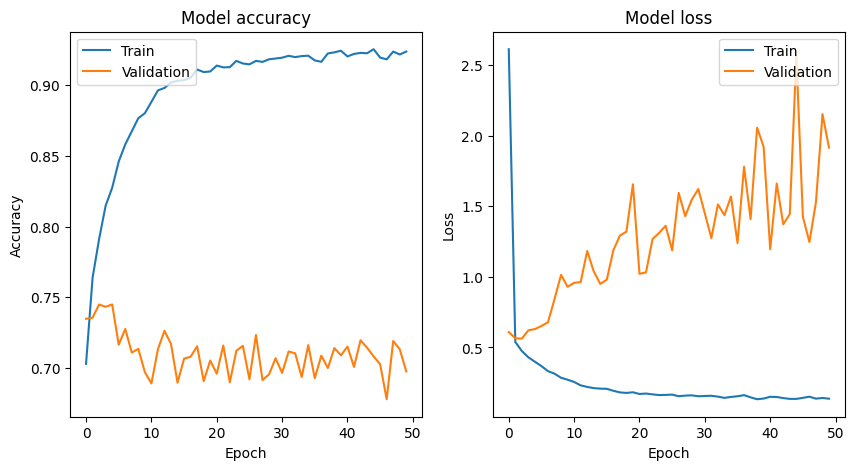

In [ ]:
# Load and preprocess the dataset
# data = pd.read_csv("path/to/your/csv_file.csv")  # Update the path to your CSV file



# Assume the DataFrame has columns "image_path" and "label"
X = paths["image_path"].values
y = paths["label"].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Load and preprocess images
def load_and_preprocess_images(image_paths, img_size=(150, 150)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=img_size)
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

X_train_processed = load_and_preprocess_images(X_train)
X_test_processed = load_and_preprocess_images(X_test)

# Create the ResNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# base_model = ResNet50(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# Train the model with the dataset
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=100, validation_data=(X_test_processed, y_test))

# Evaluate the model
score = model.evaluate(X_test_processed, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('drive/MyDrive/Accuracy.pdf')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('drive/MyDrive/effnetb0_noaugment.pdf')
# plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for the test set
y_pred = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

y_pred_train = model.predict(X_train_processed)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

cm = confusion_matrix(y_train, y_pred_classes_train)
print("Confusion Matrix:\n", cm)

118/118 [==============================] - 3s 15ms/step
Confusion Matrix:
 [[1386  646]
 [ 513 1214]]
470/470 [==============================] - 7s 14ms/step
Confusion Matrix:
 [[6945 1003]
 [  13 7074]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
import timm
import torch
from tensorflow.keras.layers import Lambda

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer

class ToTorchTensor(Layer):
    def call(self, inputs, *args, **kwargs):
        inputs = K.permute_dimensions(inputs, (0, 3, 1, 2))
        return torch.from_numpy(inputs.numpy())

class ToTFTensor(Layer):
    def call(self, inputs, *args, **kwargs):
        return tf.convert_to_tensor(inputs.detach().numpy())


# Assume the DataFrame has columns "image_path" and "label"
X = paths["image_path"].values
y = paths["label"].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Load and preprocess images
def load_and_preprocess_images(image_paths, img_size=(224, 224)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=img_size)
        img = img_to_array(img)
        img = img / 255.0  # Swin Transformer expects inputs in the range [0, 1]
        images.append(img)
    return np.array(images)

X_train_processed = load_and_preprocess_images(X_train)
X_test_processed = load_and_preprocess_images(X_test)

# input_layer = Input(shape=(150, 150, 3))
# swin_config = timm.models.swin_transformer.default_cfg.copy()
# swin_config['input_size'] = (3, 150, 150)

# Create the Swin Transformer model
input_layer = Input(shape=(224, 224, 3))

# Add a Lambda layer to convert the TensorFlow tensor to a PyTorch tensor
to_pytorch_tensor = ToTorchTensor()
x = to_pytorch_tensor(input_layer)

base_model = timm.create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=0, in_chans=3)
x = base_model(input_layer)

# Add a Lambda layer to convert the PyTorch tensor back to a TensorFlow tensor
to_tf_tensor = ToTFTensor()
x = to_tf_tensor(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=input_layer, outputs=predictions)

# Train the model with the dataset
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, epochs=10, batch_size=100, validation_data=(X_test_processed, y_test))

# Evaluate the model
score = model.evaluate(X_test_processed, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('drive/MyDrive/Accuracy.pdf')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('drive/MyDrive/swin_epochs10.pdf')
# plt.show()

In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array, array_to_img

# Make a directory to save augmented images
os.makedirs('drive/MyDrive/augmented_images', exist_ok=True)

# Define the number of augmented images per original image
num_augmented_images = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images up to 20 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1,    # Randomly shift images vertically up to 10% of the height
    shear_range=0.1,           # Randomly apply shearing transformations
    zoom_range=0.1,            # Randomly zoom in on images up to 10%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill missing pixels with the nearest value
)


# Iterate through the original images
for index, row in paths.iterrows():
    image_path = row['image_path']
    label = row['label']
    
    # Load the image and convert it to a numpy array
    img = load_img(image_path)
    img_array = img_to_array(img)
    
    # Expand the dimensions to create a batch with a single image
    img_array = np.expand_dims(img_array, axis=0)
    
    # Create a generator for the current image using the ImageDataGenerator
    img_gen = train_datagen.flow(img_array, batch_size=1, save_to_dir='drive/MyDrive/augmented_images', save_prefix=f'{label}_', save_format='jpeg')

    # Generate augmented images and save them to the 'augmented_images' folder
    for i in range(num_augmented_images):
        img_gen.next()


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB0
import os

# Define the image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images up to 20 degrees
    # width_shift_range=0.1,     # Randomly shift images horizontally up to 10% of the width
    # height_shift_range=0.1,    # Randomly shift images vertically up to 10% of the height
    # shear_range=0.1,           # Randomly apply shearing transformations
    zoom_range=0.1,            # Randomly zoom in on images up to 10%
    # horizontal_flip=True,      # Randomly flip images horizontally
    # fill_mode='nearest'        # Fill missing pixels with the nearest value
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define the dataset paths and labels
paths = pd.DataFrame(columns=['image_path', 'label'])

directories = []
contacts = []

for name in os.listdir('contact_0'):
    path = os.path.join('contact_0', name)
    directories.append(path)
    contacts.append(0)

for name in os.listdir('contact_1'):
    path = os.path.join('contact_1', name)
    directories.append(path)
    contacts.append(1)

directories = np.array(directories)
contacts = np.array(contacts)
paths['image_path'] = directories
paths['label'] = contacts

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(paths['label'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(paths['image_path'], y_encoded, test_size=0.2, random_state=42)

# Define the image generators for the training and testing sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': X_train, 'label': y_train}),
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=100,
    class_mode='raw'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': X_test, 'label': y_test}),
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=100,
    class_mode='raw'
)

# Define the ResNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Found 15035 validated image filenames.
Found 3759 validated image filenames.


In [ ]:
# Train the model with the dataset using image generators
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('drive/MyDrive/Accuracy.pdf')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('drive/MyDrive/effnet_augment.pdf')
# plt.show()


Epoch 1/50
151/151 [==============================] - 222s 1s/step - loss: 2.2255 - accuracy: 0.7091 - val_loss: 1.3843 - val_accuracy: 0.5406
Epoch 2/50
151/151 [==============================] - 180s 1s/step - loss: 0.5401 - accuracy: 0.7438 - val_loss: 1.1179 - val_accuracy: 0.5406
Epoch 3/50
151/151 [==============================] - 179s 1s/step - loss: 0.5139 - accuracy: 0.7604 - val_loss: 1.0576 - val_accuracy: 0.5406
Epoch 4/50
151/151 [==============================] - 179s 1s/step - loss: 0.4873 - accuracy: 0.7767 - val_loss: 0.9430 - val_accuracy: 0.5422
Epoch 5/50
151/151 [==============================] - 179s 1s/step - loss: 0.4717 - accuracy: 0.7811 - val_loss: 1.0241 - val_accuracy: 0.5406
Epoch 6/50
151/151 [==============================] - 180s 1s/step - loss: 0.4617 - accuracy: 0.7910 - val_loss: 0.7417 - val_accuracy: 0.5358
Epoch 7/50
151/151 [==============================] - 179s 1s/step - loss: 0.4446 - accuracy: 0.7993 - val_loss: 1.0078 - val_accuracy: 0.5400

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get true labels and file paths from the test_generator
y_true = test_generator.labels
filepaths = test_generator.filepaths

# Generate predictions
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
# Predict the classes for the test set
y_pred = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

y_pred_train = model.predict(X_train_processed)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

cm = confusion_matrix(y_train, y_pred_classes_train)
print("Confusion Matrix:\n", cm)

118/118 [==============================] - 2s 10ms/step
Confusion Matrix:
 [[1195  837]
 [ 204 1523]]
470/470 [==============================] - 5s 10ms/step
Confusion Matrix:
 [[5070 2878]
 [ 478 6609]]
